### Discussion Related With Outliers And Impact On Machine Learning!!
#### Which Machine LEarning Models Are Sensitive To Outliers?
1. Naivye Bayes Classifier--- Not Sensitive To Outliers
2. SVM-------- Not Sensitive To Outliers
3. Linear Regression---------- Sensitive To Outliers
4. Logistic Regression------- Sensitive To Outliers
5. Decision Tree Regressor or Classifier---- Not Sensitive To Outliers
6. Ensemble(RF,XGboost,GB)-------  Not Sensitive To Outliers
7. KNN---------------------------  Not Sensitive To Outliers 
8. Kmeans------------------------  Sensitive To Outliers
9. Hierarichal-------------------  Sensitive To Outliers
10. PCA--------------------------  Sensitive To Outliers
11. Neural Networks--------------  Sensitive To Outliers
###### Sensitive = Gatting Impacted

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
import seaborn as sns

C:\Users\Keshav Sharma\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

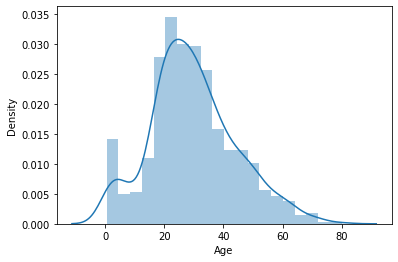

In [4]:
sns.distplot(df['Age'].dropna())

C:\Users\Keshav Sharma\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

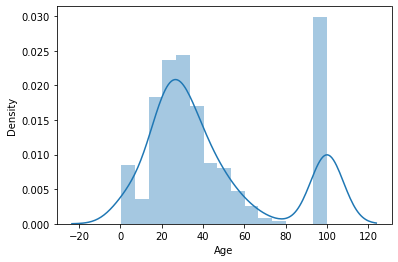

In [5]:
# Now we added the outliers
sns.distplot(df['Age'].fillna(100))

### Gaussian Distributed

Text(0, 0.5, 'No of Passengers')

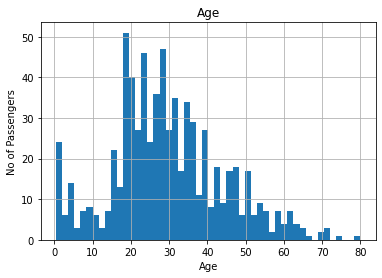

In [6]:
figure = df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of Passengers')

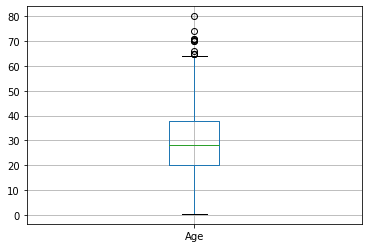

In [7]:
figure = df.boxplot(column='Age')

In [8]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### If The Data Is Normally Distributed We use this


In [12]:
###   Assuming Age follows A Gaussion Distribution we will  calculate the boundaries which
###   differentiates the outliers
 
upper_boundary = df["Age"].mean() + 3 * df["Age"].std()
lower_boundary = df["Age"].mean() - 3 * df["Age"].std()
print('upper_boundary : ',lower_boundary),print('upper_boundary : ',upper_boundary),print('mean : ',df['Age'].mean())

upper_boundary :  -13.880374349943303
upper_boundary :  73.27860964406094
mean :  29.69911764705882


(None, None, None)

In [14]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR = df.Age.quantile(0.75) - df.Age.quantile(0.25)
IQR

17.875

In [18]:
lower_bridge = df['Age'].quantile(0.25) - (IQR*1.5)
upper_bridge = df['Age'].quantile(0.75) + (IQR* 1.5)
print(lower_bridge) , print(upper_bridge)

-6.6875
64.8125


(None, None)

In [20]:
#### Extreme outliers
lower_bridge=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-45.7146
84.625


(None, None)

### Feature Skeweed
#### If Features Are Skewed We Use the below Technique

Text(0, 0.5, 'No of Passengers')

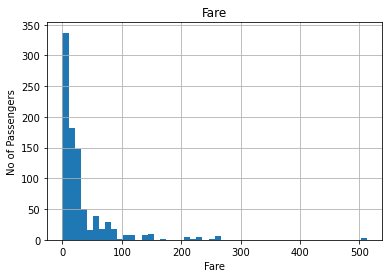

In [23]:
figure = df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of Passengers')

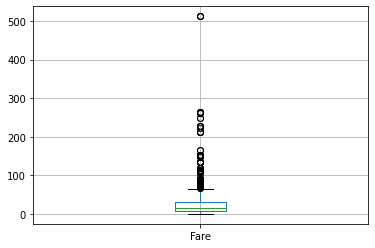

In [24]:
figure = df.boxplot(column='Fare')

In [25]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [26]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)

In [32]:
lower_bridge = df['Fare'].quantile(0.25) - (IQR*3)
upper_bridge = df.Fare.quantile(0.75)+(IQR*3)
print(upper_bridge),print(lower_bridge)

100.2688
-61.358399999999996


(None, None)

In [33]:
data = df.copy()

In [35]:
data.loc[data['Age']>=73,'Age']=73

In [37]:
data.loc[data['Fare']>=100,'Fare']=100

Text(0, 0.5, 'No of passenger')

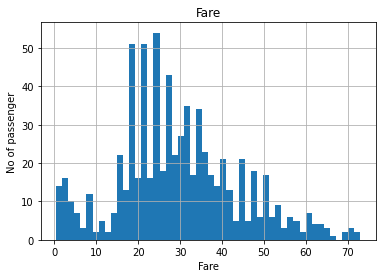

In [43]:
figure=data.Age.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

Text(0, 0.5, 'No of passenger')

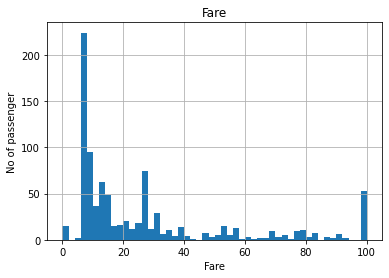

In [44]:
figure=data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [58]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.664179104477612
roc_auc_score: 0.6947233993150287
